In [13]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [14]:
# Read the csv file into a pandas DataFrame
abnb_90 = pd.read_csv('abnb_df_90_ML.csv')

In [15]:
abnb_nrows = len(abnb_90.index)
abnb_nrows

45525

In [16]:
# Assign the data to X and y
# Note: Sklearn requires a two-dimensional array of values
# so we use reshape to create this

X = abnb_90.number_of_reviews.values.reshape(-1, 1)
y = abnb_90.price.values.reshape(-1, 1)

print("Shape: ", X.shape, y.shape)
X

Shape:  (45525, 1) (45525, 1)


array([[ 23],
       [ 28],
       [  0],
       ...,
       [ 21],
       [  0],
       [108]])

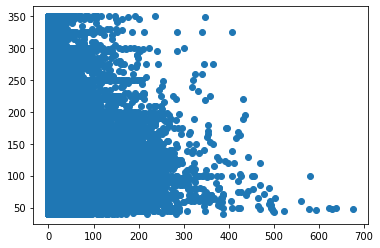

In [17]:
# Plot the data

plt.scatter(X, y)


In [18]:
# Create the model and fit the model to the data

from sklearn.linear_model import LinearRegression

model = LinearRegression()

In [19]:
# Fit the model to the data.

model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [20]:
# Print the coefficient and the intercept for the model

print('Weight coefficients: ', model.coef_)
print('y-axis intercept: ', model.intercept_)

Weight coefficients:  [[-0.06668308]]
y-axis intercept:  [128.72204594]


In [21]:
 # Note: we have to transform our min and max values 
# so they are in the format: array([[ 1.17]])
# This is the required format for `model.predict()`

x_min = np.array([[X.min()]])
x_max = np.array([[X.max()]])
print(f"Min X Value: {x_min}")
print(f"Max X Value: {x_max}")

Min X Value: [[0]]
Max X Value: [[675]]


In [22]:
# Calculate the y_min and y_max using model.predict and x_min and x_max

y_min = model.predict(x_min)
y_max = model.predict(x_max)

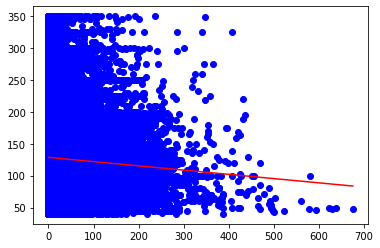

In [24]:
# Plot X and y using plt.scatter
# Plot the model fit line using [x_min[0], x_max[0]], [y_min[0], y_max[0]]

plt.scatter(X, y, c='blue')
plt.plot([x_min[0], x_max[0]], [y_min[0], y_max[0]], c='red')


plt.savefig('linear_reg_numReviews.png')